In [27]:
import scipy.stats as st
import numpy as np
import matplotlib
import inspect
import csv
import matplotlib.pyplot as plt
import csv
import statistics
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import math

def calculate_confidence(x):
    confidence = st.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=st.sem(x))
    frame = inspect.currentframe()
    name = inspect.getframeinfo(frame).function
    
    return confidence



1. Save your .csv file as either "icf.csv" or "rmf.csv" and put it in the same folder path as this notebook
2. To get the graphs for a particular variable and a particular metric, use the functions like below -
    purchase_history("icf.csv", "Precision")

In [28]:
def purchase_history(filename, metric):
    figure = ()
    label = filename[:3]
    print(filename)
    print(label)
    org_items_dict = {}
    with open(filename, 'r', newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row['Rating'] == '5':
                count = int(row['Original Items'])
                new_count = count - (count % 10)
                if new_count in org_items_dict:
                    org_items_dict[new_count].append(row[metric])
                else:
                    org_items_dict[new_count] = [row[metric]]

    org_items_dict = sorted(org_items_dict.items(), key = lambda kv:kv[0])
    org_items_arr, org_items_vals = [], []


    var, cf = [], []
    for val in org_items_dict:
        org_items_arr.append(float(val[0]))
        org_items_vals.append((sum(float(l) for l in val[1]))/len(val[1]))
        var.append(np.var([float(l) for l in val[1]]))
        cf.append(calculate_confidence([float(l) for l in val[1]]))


    plt.plot(org_items_arr, org_items_vals, linestyle='-', color = 'r', label = 'Mean')
    plt.plot(org_items_arr, var, linestyle = 'dashed', color ='b', label = 'Variance')
    min_error = [l[0] for l in cf]
    max_error = [l[1] for l in cf]
    yerror = [min_error, max_error]
    plt.errorbar(org_items_arr, org_items_vals ,yerr=yerror, fmt='o', label = 'Confidence Interval')
    
    title = "Movies " + label
    ylabel = "Avg Attack " + metric
    plt.xlabel("Items in Purchase History")
    plt.title(title)
    plt.ylabel("Avg Attack Precision")
    
    frame = inspect.currentframe()
    name = inspect.getframeinfo(frame).function
    saveas = "Data_Viz/" + label + "/" + metric + "/" + name + ".png"
    plt.savefig(saveas, dpi=300, bbox_inches='tight')
    plt.legend()
    plt.show()

In [29]:
def target_size(filename, metric):
    figure = ()
    label = filename[:3]
    print(filename)
    print(label)
    target_data_icf = {}
    with open(filename, 'r', newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row['Rating'] == '5':
                if row['Target_Size'] in target_data_icf:
                    target_data_icf[row['Target_Size']].append(row[metric])
                else:
                    target_data_icf[row['Target_Size']] = [row[metric]]

    x = list(target_data_icf.keys())
    y = [sum([float(v) for v in l]) /len(l) for l in list(target_data_icf.values())]

    var = [np.var([float(v) for v in l]) for l in list(target_data_icf.values())[::-1]]
    cf = [calculate_confidence([float(v) for v in l]) for l in list(target_data_icf.values())[::-1]]

    cf = [list(l) for l in cf]

    plt.plot(x, y, linestyle='-', color = 'r', label = 'Mean')
    plt.plot(x, var, linestyle = 'dashed', color ='b', label = 'Variance')
    min_error = [l[0] for l in cf]
    max_error = [l[1] for l in cf]
    yerror = [min_error, max_error]
    plt.errorbar(x,y,yerr=yerror, fmt='o', label = 'Confidence Interval')

    title = "Movies " + label
    ylabel = "Avg Attack " + metric
    plt.title(title)
    plt.xlabel("Target Size")

    plt.ylabel(ylabel)
    frame = inspect.currentframe()
    name = inspect.getframeinfo(frame).function
    saveas = "Data_Viz/" + label + "/" + metric + "/" + name + ".png"
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.savefig(saveas, dpi=300, bbox_inches='tight')

In [30]:
# How many attack recommendations yeild the max benefit?
def rec_attack(filename, metric):
    figure = ()
    label = filename[:3]
    print(filename)
    print(label)
    train_data_icf = {}
    with open(filename, 'r', newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row['Rating'] == '5':
                if row['Num_of_preds(K_A)'] in train_data_icf:
                    train_data_icf[row['Num_of_preds(K_A)']].append(row[metric])
                else:
                    train_data_icf[row['Num_of_preds(K_A)']] = [row[metric]]

    x = list(train_data_icf.keys())[::-1]
    y = [sum([float(v) for v in l]) /len(l) for l in list(train_data_icf.values())[::-1]]

    var = [np.var([float(v) for v in l]) for l in list(train_data_icf.values())[::-1]]
    cf = [calculate_confidence([float(v) for v in l]) for l in list(train_data_icf.values())[::-1]]

    cf = [list(l) for l in cf]

    plt.plot(x, y, linestyle='-', color = 'r', label = 'Mean')
    plt.plot(x, var, linestyle = 'dashed', color ='b', label = 'Variance')
    min_error = [l[0] for l in cf]
    max_error = [l[1] for l in cf]
    yerror = [min_error, max_error]
    plt.errorbar(x,y,yerr=yerror, fmt='o', label = 'Confidence Interval')

    title = "Movies " + label
    plt.title(title)
    ylabel = "Avg Attack " + metric
    plt.xlabel("Attack Recommendations")
    plt.ylabel(ylabel)
    frame = inspect.currentframe()
    name = inspect.getframeinfo(frame).function
    saveas = "Data_Viz/" + label + "/" + metric + "/" + name + ".png"
    plt.legend(loc="upper left")
    plt.savefig(saveas, dpi=300, bbox_inches='tight')
    plt.show()

In [31]:
def recs_obs(filename, metric):
    figure = ()
    label = filename[:3]
    train_data_icf = {}
    with open(filename, 'r', newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row['Rating'] == '5':
                if row['Num of Recs(K_O)'] in train_data_icf:
                    train_data_icf[row['Num of Recs(K_O)']].append(row[metric])
                else:
                    train_data_icf[row['Num of Recs(K_O)']] = [row[metric]]

    x = list(train_data_icf.keys())[::-1]
    y = [sum([float(v) for v in l]) /len(l) for l in list(train_data_icf.values())[::-1]]


    var = [np.var([float(v) for v in l]) for l in list(train_data_icf.values())[::-1]]
    cf = [calculate_confidence([float(v) for v in l]) for l in list(train_data_icf.values())[::-1]]

    cf = [list(l) for l in cf]

    plt.plot(x, y, linestyle='-', color = 'r', label = 'Mean')
    plt.plot(x, var, linestyle = 'dashed', color ='b', label = 'Variance')
    min_error = [l[0] for l in cf]
    max_error = [l[1] for l in cf]
    yerror = [min_error, max_error]
    plt.errorbar(x,y,yerr=yerror, fmt='o', label = 'Confidence Interval')

    title = "Movies " + label
    plt.title(title)
    ylabel = "Avg Attack " + metric
    plt.xlabel("Recommendations observed")
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.ylabel(ylabel)
    frame = inspect.currentframe()
    name = inspect.getframeinfo(frame).function
    saveas = "Data_Viz/" + label + "/" + metric + "/" + name + ".png"
    plt.savefig(saveas, dpi=300, bbox_inches='tight')
    plt.show()

In [32]:
def get_stats(filename, metric):
    figure = ()
    label = filename[:3]
    precision = []
    train_data = {}
    with open(filename, 'r', newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row['Rating'] == '5':
                precision.append(float(row[metric]))

    m1 = statistics.mean(precision)

    v1 = np.var(precision)

    c1 = calculate_confidence(precision)


    print(metric + " Mean: ", m1)
    print(metric + " Variance: ", v1)
    print(metric + " CI: ", c1)

In [44]:
def metric_hist(filename, metric):
    rmse_users = set()
    label = filename[:3]
    with open(filename, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            r = row[metric].replace(" ", "")
            rmse_users.add((row['User'], r))
    
    vals = []
    for t in rmse_users:
        try:
            vals.append(float(t[1]))
        except:
            pass
    
    print(np.mean(vals))
    x_text = metric + " " + label
    plt.hist(vals, density=False)
    plt.xlabel(x_text)
    plt.ylabel("Frequency Count")
    saveas = "Data_Viz/" + label + "/" + metric + "hist" + ".png"
    plt.savefig(saveas, dpi=300, bbox_inches='tight')
    plt.show()

In [34]:
def get_unique_users(filename):
    users = []
    with open(filename, 'r', newline="") as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row['User'] in users:
                continue
            users.append(row['User'])
    return len(users)

In [35]:
def get_hits(filename):
    with open(filename, 'r') as csvfile:
        val = 0
        reader = csv.DictReader(csvfile)
        for row in reader:
            r = int(row['Hits'])
            val += r
    
    
    return val

In [36]:
def rmse_vs_metric(filename, metric):
    figure = ()
    label = filename[:3]
    rmse_dict = {}
    with open(filename, 'r', newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            r = int(float(row['Eval_RMSE']))
            if r in rmse_dict:
                rmse_dict[r].append(row[metric])
            else:
                rmse_dict[r] = [row[metric]]

    rmse_dict = sorted(rmse_dict.items(), key = lambda kv:kv[0])
    print(rmse_dict)
    rmse_arr, rmse_vals, rmse = [], [], []

    for val in rmse_dict:
        rmse_arr.append(float(val[0]))
        rmse_vals.append((sum(float(l) for l in val[1]))/len(val[1]))
        rmse.append(val[1])

    var = [np.var([float(v) for v in l]) for l in rmse]
    cf = [calculate_confidence([float(v) for v in l]) for l in list(rmse)]

    cf = [list(l) for l in cf]

    plt.plot(rmse_arr, rmse_vals, linestyle = '-', color ='r', label = 'Mean')
    plt.plot(rmse_arr, var, linestyle = "dashed", color = 'b', label = 'Variance')
    min_error = [l[0] for l in cf]
    max_error = [l[1] for l in cf]
    yerror = [min_error, max_error]
    plt.errorbar(rmse_arr, rmse_vals, yerr=yerror, fmt='o', label = 'Confidence Interval')
    
    title = "Movies " + label
    plt.title(title)
    ylabel = "Avg Attack " + metric
    plt.xlabel("Attacker RMSE")
    plt.ylabel(ylabel)
    plt.gca().set_ylim(0, 5)
    
    saveas = "Data_Viz/" + label + "/eval_rmse_" + metric + ".png"
    plt.savefig(saveas, dpi=300, bbox_inches='tight')
    plt.show()

In [15]:
def purchase_history2(filename, metric):
    figure = ()
    label = filename[:3]
    print(filename)
    print(label)
    org_items_dict = {}
    with open(filename, 'r', newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row['Rating'] == '5':
                count = int(row['Original Items'])
                new_count = count - (count % 10)
                if new_count in org_items_dict:
                    org_items_dict[new_count].append(row[metric])
                else:
                    org_items_dict[new_count] = [row[metric]]

    org_items_dict = sorted(org_items_dict.items(), key = lambda kv:kv[0])

    org_items_arr, org_items_vals = [], []
    
    labels, data = [*zip(*org_items_dict)]  # 'transpose' items to parallel key, value lists

    fig = go.Figure()

    for i,row in enumerate(data):
        fig.add_trace(go.Box(y=np.array(row).astype(np.float), quartilemethod="linear", name=labels[i]))

    fig.update_layout(title_text="RecSys RMSE vs Attacker RMSE",
                     xaxis_title="Purchase History",
                     yaxis_title="Attack Model RMSE")
    fig.show()

In [24]:
mf_precision = {}
with open('Final Results/Movies_results_icf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        
        if row['Num of Recs(K_O)'] in mf_precision:
            mf_precision[row['Num of Recs(K_O)']].append(row['Eval_RMSE'])
        else:
            mf_precision[row['Num of Recs(K_O)']] = [row['Eval_RMSE']]

# Pythopn 3.5+
labels, data = [*zip(*mf_precision.items())]  # 'transpose' items to parallel key, value lists

fig = go.Figure()
nd = []
for i,row in enumerate(data):
    fig.add_trace(go.Box(y=np.array(row).astype(np.float), quartilemethod="linear", name=labels[i]))
    
fig.update_layout(title_text="Recs Obs VS Eval RMSE",
                 xaxis_title="Recommendations observed",
                 yaxis_title="Attack Model RMSE")
fig.show()


4.303743513176997


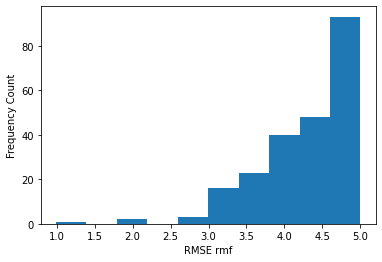

In [47]:
metric_hist("Final Results/Movies_results_rmf.csv", "RMSE")

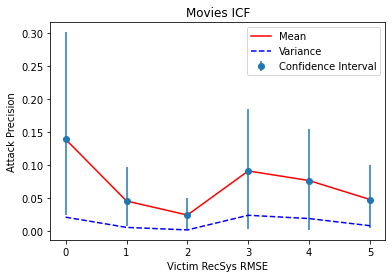

In [49]:
rmse_dict = {}
with open('Final Results/Movies_results_icf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        r = int(float(row['RMSE']))
        if r in rmse_dict:
            rmse_dict[r].append(row['Precision'])
        else:
            rmse_dict[r] = [row['Precision']]
            
rmse_arr = list(rmse_dict.keys())
rmse_vals = [sum([(float(l)) for l in k])/len(k) for k in list(rmse_dict.values())]
rmse_dict = sorted(rmse_dict.items(), key = lambda kv:kv[0])

rmse_arr, rmse_vals, rmse = [], [], []

for val in rmse_dict:
    rmse_arr.append(float(val[0]))
    rmse_vals.append((sum(float(l) for l in val[1]))/len(val[1]))
    rmse.append(val[1])
    
var = [np.var([float(v) for v in l]) for l in rmse]
cf = [calculate_confidence([float(v) for v in l]) for l in list(rmse)]

cf = [list(l) for l in cf]

plt.plot(rmse_arr, rmse_vals, linestyle = '-', color ='r', label = 'Mean')
plt.plot(rmse_arr, var, linestyle = "dashed", color = 'b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(rmse_arr, rmse_vals, yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.title("Movies ICF")
plt.xlabel("Victim RecSys RMSE")
plt.ylabel("Attack Precision")
plt.legend()
plt.show()

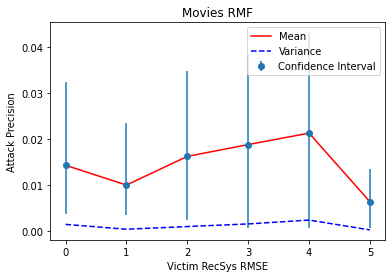

In [51]:
rmse_dict = {}
with open('Final Results/Movies_results_rmf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        r = int(float(row['RMSE']))
        if r in rmse_dict:
            rmse_dict[r].append(row['Precision'])
        else:
            rmse_dict[r] = [row['Precision']]
            
rmse_arr = list(rmse_dict.keys())
rmse_vals = [sum([(float(l)) for l in k])/len(k) for k in list(rmse_dict.values())]
rmse_dict = sorted(rmse_dict.items(), key = lambda kv:kv[0])

rmse_arr, rmse_vals, rmse = [], [], []

for val in rmse_dict:
    rmse_arr.append(float(val[0]))
    rmse_vals.append((sum(float(l) for l in val[1]))/len(val[1]))
    rmse.append(val[1])
    
var = [np.var([float(v) for v in l]) for l in rmse]
cf = [calculate_confidence([float(v) for v in l]) for l in list(rmse)]

cf = [list(l) for l in cf]

plt.plot(rmse_arr, rmse_vals, linestyle = '-', color ='r', label = 'Mean')
plt.plot(rmse_arr, var, linestyle = "dashed", color = 'b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(rmse_arr, rmse_vals, yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.title("Movies RMF")
plt.xlabel("Victim RecSys RMSE")
plt.ylabel("Attack Precision")
plt.legend()
plt.show()